## Imports

In [ ]:
import numpy as np
import pandas as pd
import time
import os
import aux_tools as aux
import Tabesh2013functions as tbsh
from collections import defaultdict

## Cargar el modelo de bloques
En este caso estoy usando el CP fases clusterizado

In [3]:
df_mina = pd.read_csv("df_mina_clustered_4.csv")
df_mina.rename(columns={'final_cluster_id': 'cluster'}, inplace=True)
df_mina.head()

,x,y,z,au,cpy,cueq,cus,cut,density,material,py,recg_au,recg_cu,tasox,tipomineral,fase,id,banco,cluster,final_cluster_label
0,491425.0,7456205.0,1968.0,0.288929,1.124707,0.712658,0.022003,0.550661,2.615598,8,0.401511,69.001505,87.011938,0.039957,2,4,1,22,1,F4_B22_C1
1,491435.0,7456195.0,1968.0,0.266522,1.057851,0.640223,0.021141,0.491924,2.626056,8,0.197908,68.839492,87.471598,0.042976,2,4,2,22,1,F4_B22_C1
2,491445.0,7456195.0,1968.0,0.243283,2.427782,0.531022,0.019991,0.396348,2.637350,6,0.399009,68.633711,87.659524,0.050438,2,4,3,22,1,F4_B22_C1
3,491455.0,7456195.0,1968.0,0.243283,2.427782,0.531022,0.019991,0.396348,2.637350,6,0.399009,68.633711,87.659524,0.050438,2,4,4,22,1,F4_B22_C1
4,491435.0,7456205.0,1968.0,0.288929,1.124707,0.712658,0.022003,0.550661,2.615598,8,0.401511,69.001505,87.011938,0.039957,2,4,5,22,1,F4_B22_C1


### Calcular precedencias verticales

In [4]:
global_arcs = aux.Global_Vertical_Arc_Calculation(df_mina)

En este caso, entre la fase 1 bancos 1 y 2 hay precedencias, grafiquémoslas

In [5]:
f1,b1 = 1,1
f2,b2 = 1,2
df1 = df_mina[(df_mina['fase']==f1)&(df_mina['banco']==b1)].copy()
df2 = df_mina[(df_mina['fase']==f2)&(df_mina['banco']==b2)].copy()
xmin = min(df1['x'].min(),df2['x'].min())
xmax = max(df1['x'].max(),df2['x'].max())

ymin = min(df1['y'].min(),df2['y'].min())
ymax = max(df1['y'].max(),df2['y'].max())

Tratando 'cluster' como Categórica (5 valores únicos).


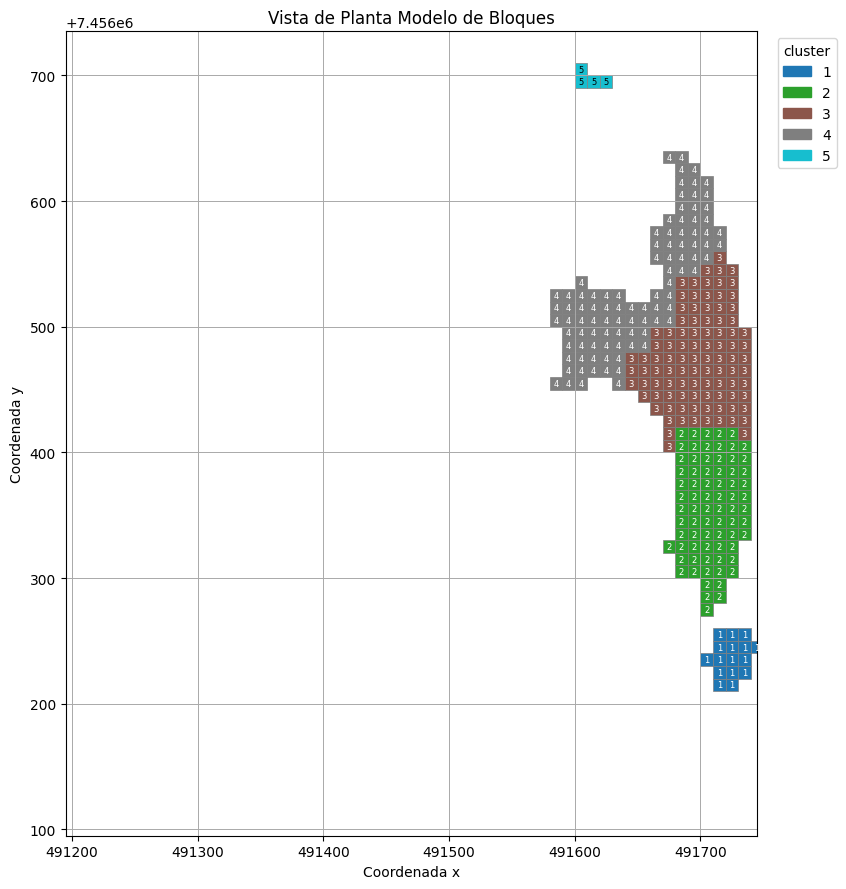

In [7]:
aux.plot_mine_blocks_adv(df1,'cluster',xlim=[xmin,xmax],ylim=[ymin,ymax], show_block_labels=True)

Tratando 'cluster' como Continua.
  Escala de color: min=1.00, max=36.00


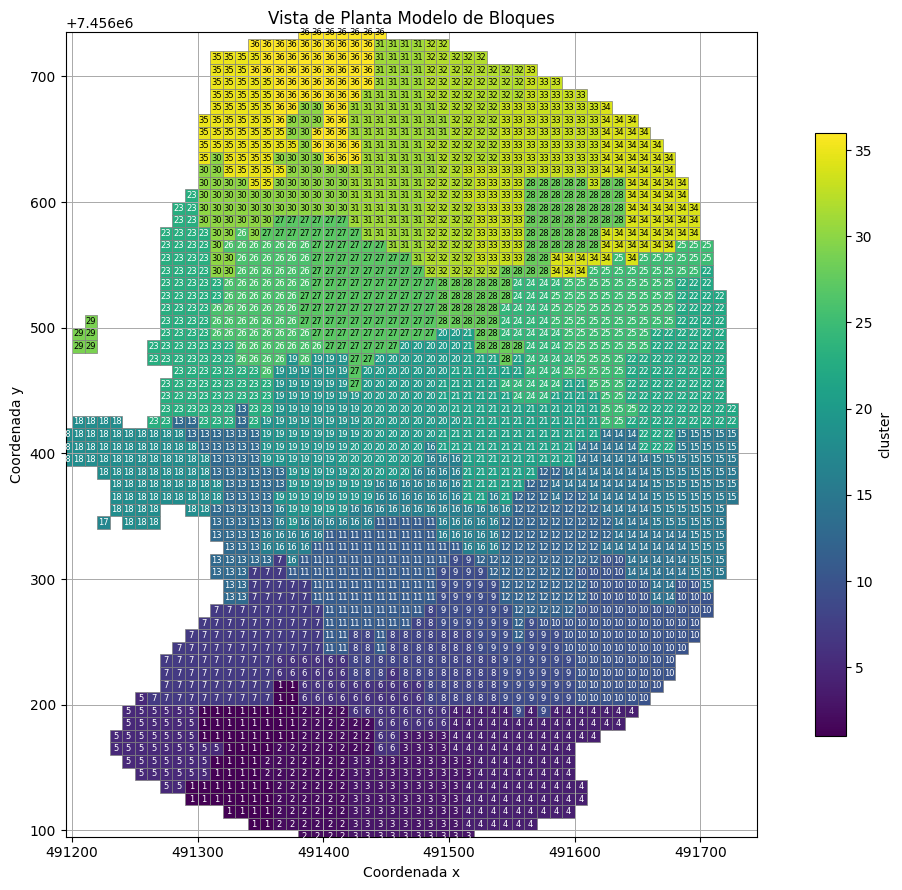

In [8]:
aux.plot_mine_blocks_adv(df2,'cluster',xlim=[xmin,xmax],ylim=[ymin,ymax],show_block_labels=True)

[(1, 1, 2)]


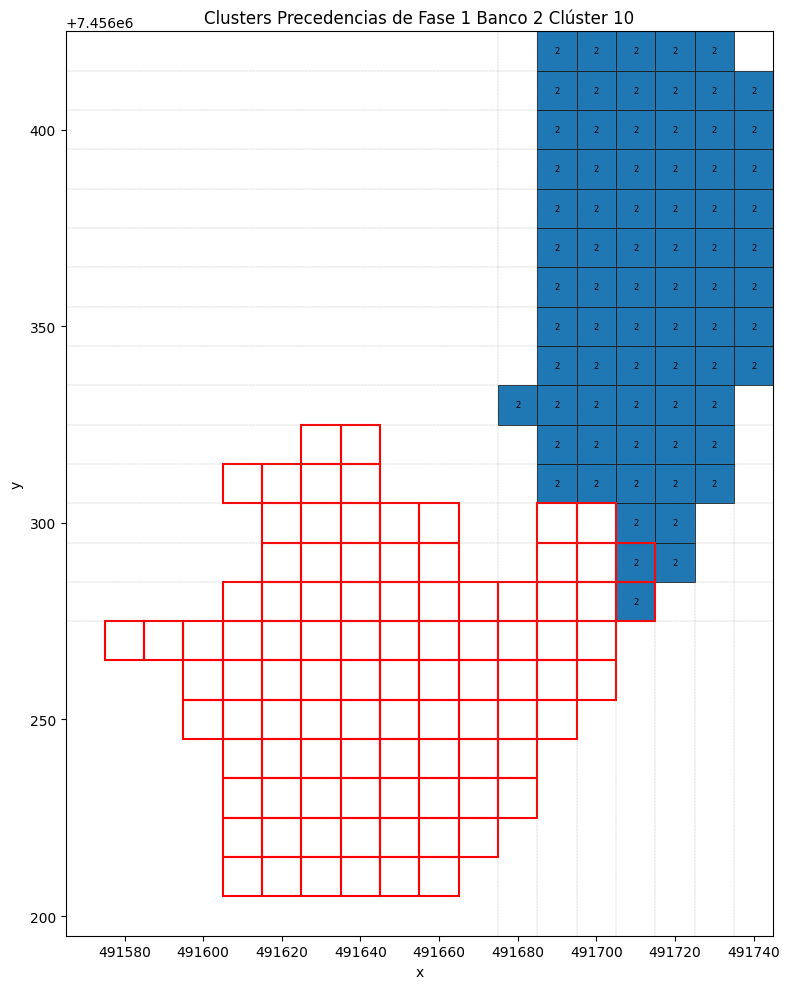

[(1, 1, 2)]


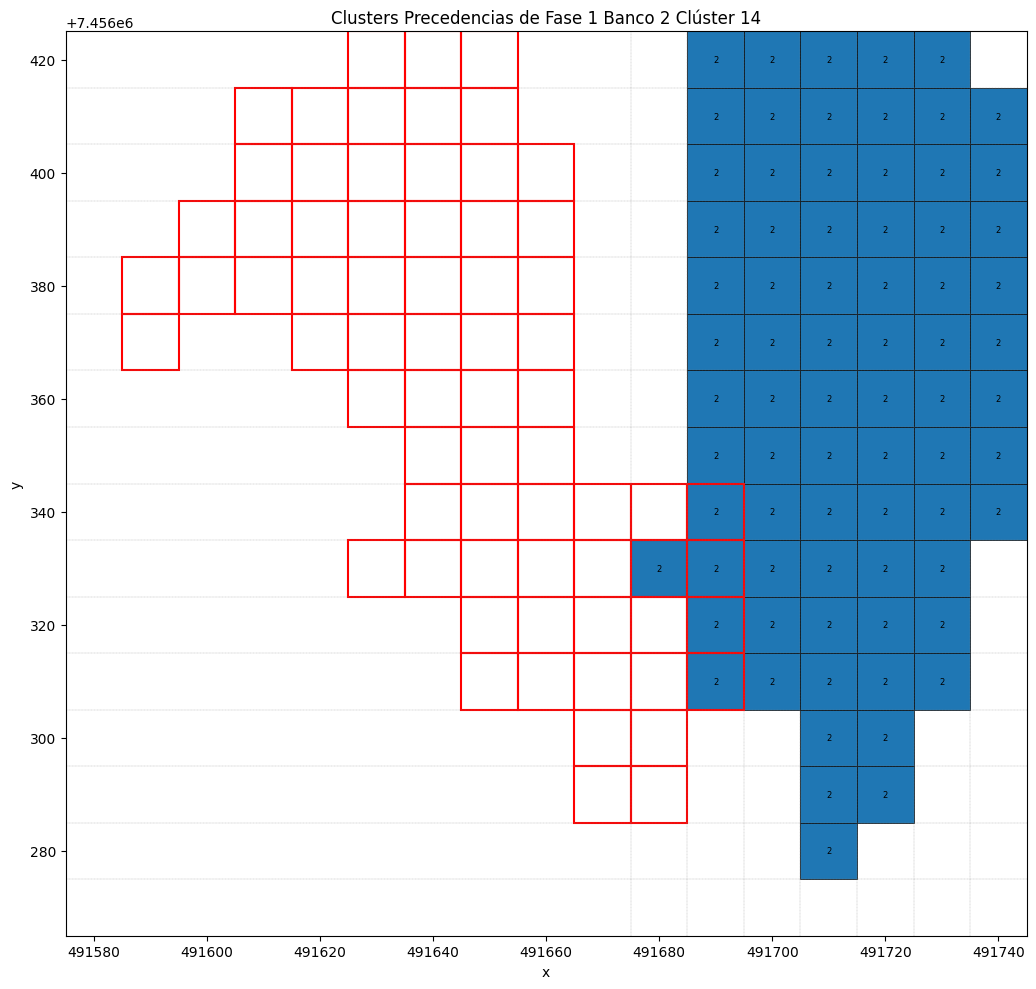

[(1, 1, 2), (1, 1, 3)]


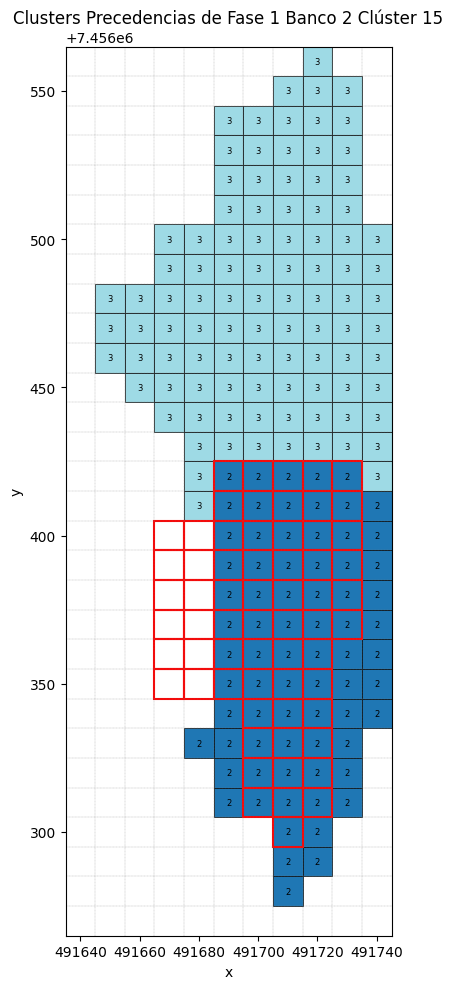

[(1, 1, 4)]


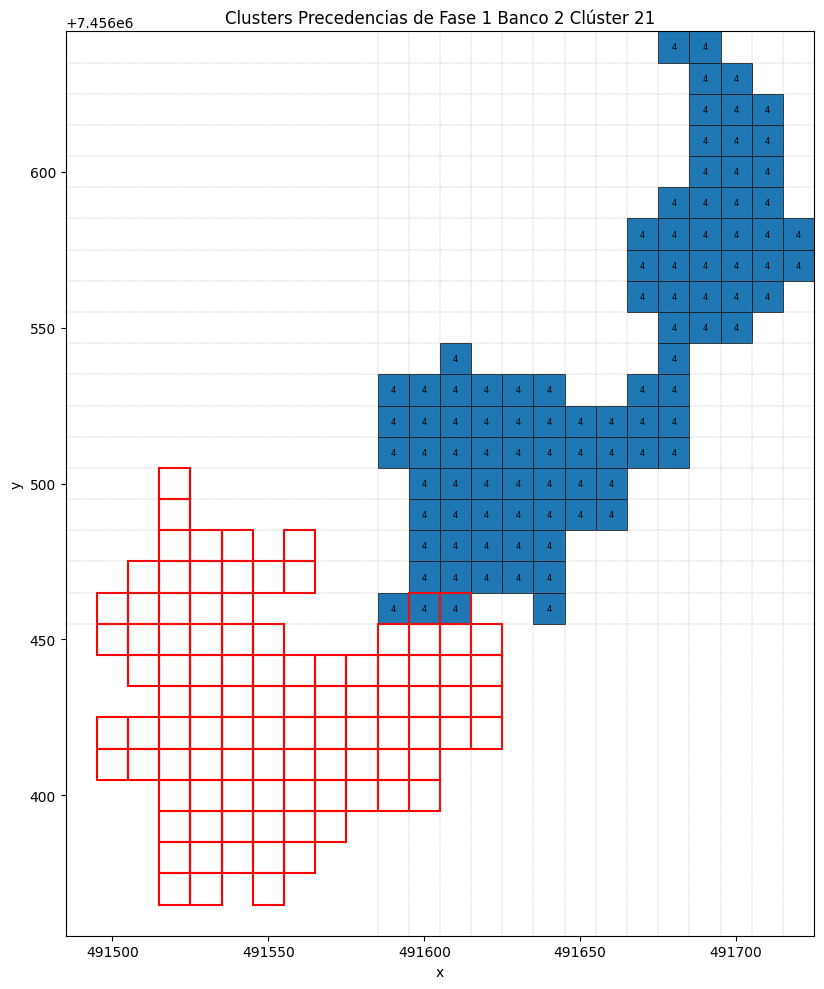

[(1, 1, 2), (1, 1, 3), (1, 1, 4)]


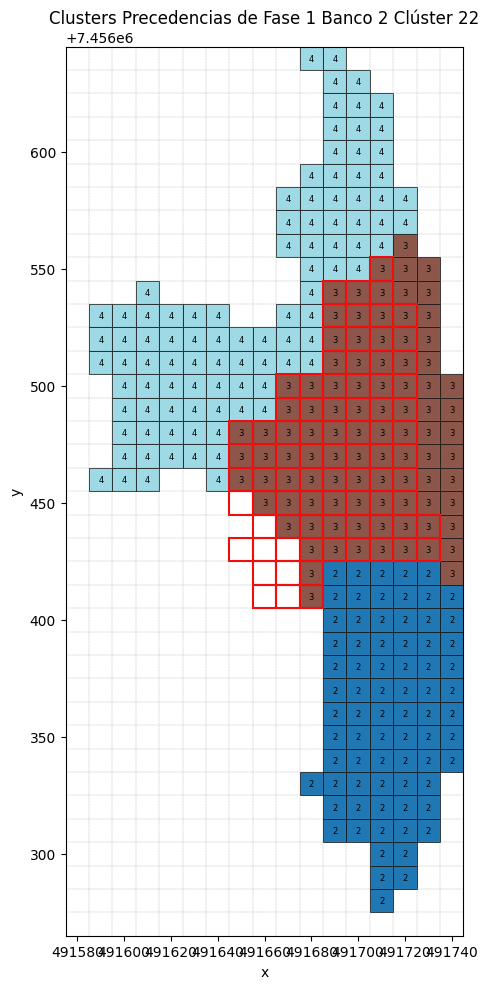

[(1, 1, 4)]


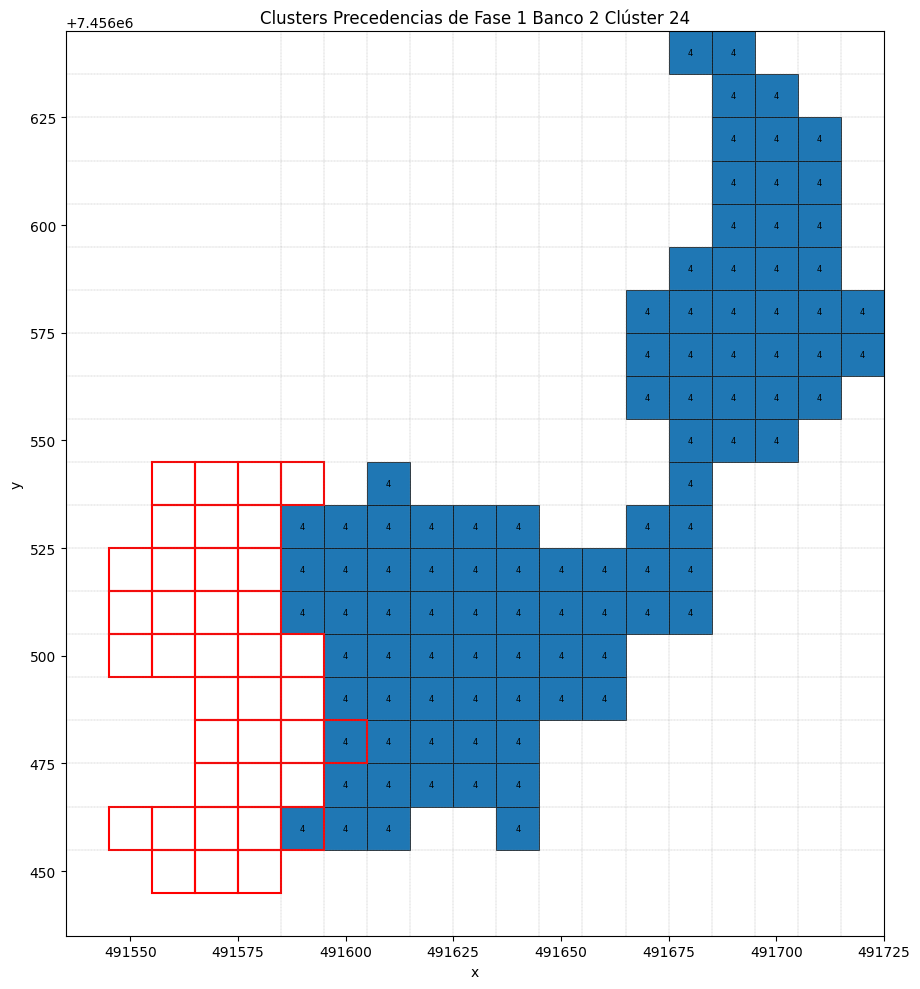

[(1, 1, 3), (1, 1, 4)]


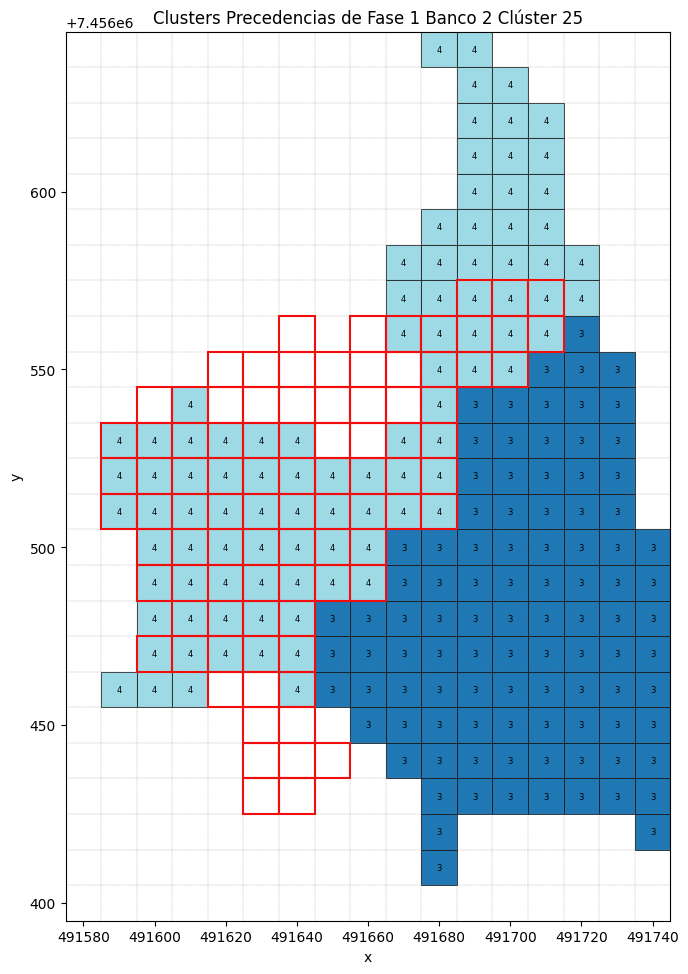

[(1, 1, 5)]


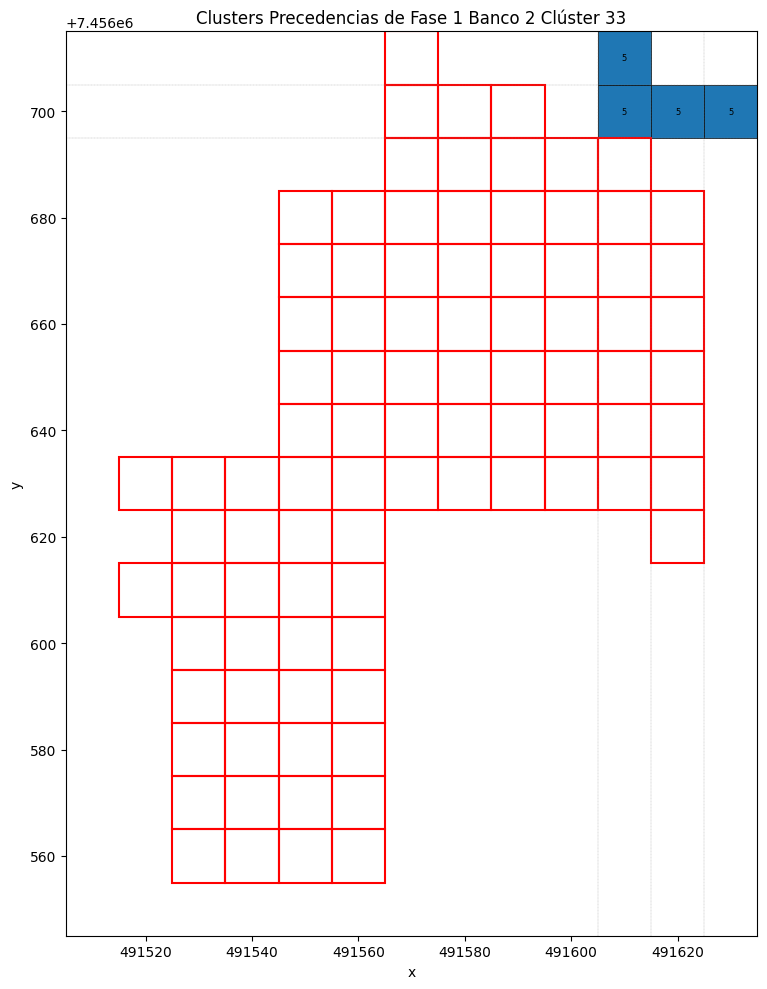

[(1, 1, 4)]


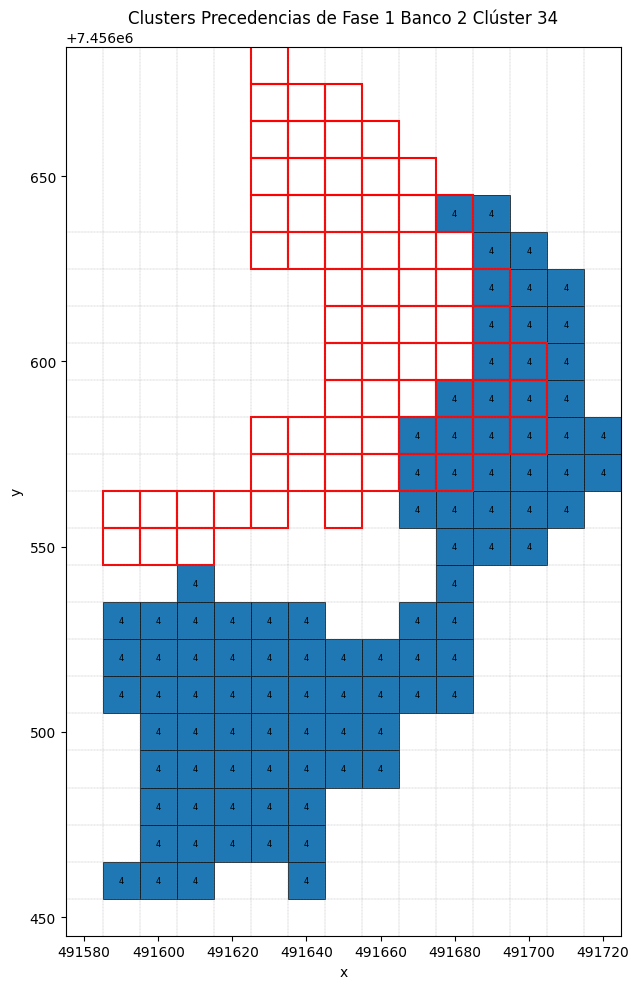

In [9]:
for cluster in df2['cluster'].unique():
    if (f2,b2,cluster) in global_arcs.keys():
        if global_arcs[(f2,b2,cluster)]:
            print(global_arcs[(f2,b2,cluster)])
            #Sclicing
            DF2 = df2[df2['cluster']==cluster]
            cluster_list = [t[2] for t in global_arcs[(f2,b2,cluster)]]
            DF1 = df1[df1['cluster'].isin(cluster_list)]
            # Plotear
            aux.plot_cluster_precedence(
                df1=DF1,
                df2=DF2,
                block_width=10,
                block_height=10,
                title=f'Clusters Precedencias de Fase {f2} Banco {b2} Clúster {cluster}',
                show_grid=True,
                figsize=(12, 10),
                dpi=100,
                outline_color='red'
            )
            # Hacer los plots lado a lado